In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

%matplotlib inline

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

## Carga de datos y visualización de cada csv

In [28]:
educacion = pd.read_csv('fiuba_1_postulantes_educacion.csv',sep=',', error_bad_lines=False, encoding='ISO-8859-1')
educacion.tail()

,idpostulante,nombre,estado
298226,GNZqARp,Terciario/TÃ©cnico,Abandonado
298227,ow2p8vk,Universitario,Abandonado
298228,6rPEvwv,Universitario,Abandonado
298229,vVja45X,Universitario,Abandonado
298230,1QPMbX3,Universitario,Abandonado


In [29]:
genero_y_edad = pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
genero_y_edad.tail()

,idpostulante,fechanacimiento,sexo
200883,1QPMbX3,1988-01-07,MASC
200884,0zPa0eq,1998-05-09,FEM
200885,2zP6Jd0,1997-03-06,FEM
200886,8MPoxDW,1997-07-07,MASC
200887,2zP6J9V,NaN,NO_DECLARA


In [30]:
visitas = pd.read_csv('fiuba_3_vistas.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
visitas.tail()

,idAviso,timestamp,idpostulante
961892,1112366944,2018-02-28T23:59:08.772-0500,MVPj3AK
961893,1001442844,2018-02-28T23:59:37.000-0500,VNrYP6m
961894,1112362644,2018-02-28T23:59:46.181-0500,owzLD43
961895,1112305277,2018-02-28T23:59:52.754-0500,A3DraY1
961896,1112345900,2018-02-28T23:59:55.409-0500,ekmNzBW


In [31]:
postulaciones = pd.read_csv('fiuba_4_postulaciones.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
postulaciones.tail()

,idaviso,idpostulante,fechapostulacion
3401618,1111753681,0zPa0eq,2018-02-28 23:54:44
3401619,1112369306,2zP6Jd0,2018-02-28 23:57:43
3401620,1112308651,8MPoxDW,2018-02-28 23:52:13
3401621,1112341128,8MPoxDW,2018-02-28 23:59:06
3401622,1112369825,2zP6J9V,2018-02-28 23:56:10


In [32]:
avisos_online = pd.read_csv('fiuba_5_avisos_online.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
avisos_online.tail()

,idaviso
5023,1112387966
5024,1112383275
5025,1112388199
5026,1112388376
5027,1112387833


In [33]:
avisos_detalle = pd.read_csv('fiuba_6_avisos_detalle.csv', sep=',', error_bad_lines=False, encoding='ISO-8859-1')
avisos_detalle.tail()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13529,1112342505,1,Vendedor de Salon -- UNOMOTOS,<p>UNOMOTOS Concesionaria lÃ­der en el rubro d...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,UNOMOTOS
13530,1112342513,1,OPERADOR DE ENSAYOS NO DESTRUCTIVOS,<p><strong>RECONOCIDA EMPRESA DE MONTAJES INDU...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,IngenierÃ­a Oficina TÃ©cnica / Proyecto,Grupo Consultor
13531,1112342456,1,Back officer Junior de Fondos Comunes de Inver...,"<p>BNP Paribas Investment Partners, importante...",Gran Buenos Aires,NaN,NaN,Full-time,Junior,Contabilidad,BNP PARIBAS ARGENTINA INVESTMENT PARTNERS S A
13532,1112342496,1,Asistente Administrativo,"<p>Somos un joven grupo gastronÃ³mico, que se ...",Gran Buenos Aires,NaN,NaN,Full-time,Gerencia / Alta Gerencia / DirecciÃ³n,AdministraciÃ³n,Cerveteca Odin Srl
13533,1112342432,1,Ingeniero para coordinaciÃ³n de obras de canal...,<p>Importante empresa de servicios para obras ...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,ConstrucciÃ³n,CIMA S.A.


## Merge entre los archivos educación y género y edad de los postulantes

Unimos los datos de ambos data frame con el fin de colocar todos los datos de los postulantes en un mismo data frame

In [34]:
postulantes = pd.merge(educacion, genero_y_edad, on='idpostulante', how='outer')
postulantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310367 entries, 0 to 310366
Data columns (total 5 columns):
idpostulante       310367 non-null object
nombre             298231 non-null object
estado             298231 non-null object
fechanacimiento    304928 non-null object
sexo               310367 non-null object
dtypes: object(5)
memory usage: 14.2+ MB


## Merge entre los archivos avisos_online y avisos_detalle

Unimos ambos datos frame con el fin de colocar los datos de todos los avisos en un mismo data frame

In [35]:
avisos = pd.merge(avisos_online, avisos_detalle, on='idaviso', how='outer')
avisos.tail()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
13844,1112342204,1.0,Ejecutivo de Ventas - Prov. de Bs. As e Interi...,"<p>Editorial Rubinzal Culzoni, lÃ­der en el Ã¡...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Rubinzal Editorial
13845,1112341862,1.0,24 Feb - Chief Software Architect ($100K/yr) -...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Tecnologia / Sistemas,CrossOver
13846,1112341899,1.0,24 Feb - Customer Support Manager ($100K/yr) -...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,Soporte TÃ©cnico,CrossOver
13847,1112341992,1.0,24 Feb - VP of Customer Support ($200K/yr) - O...,<p>Para inscribirse en el torneo debe ingresar...,Gran Buenos Aires,NaN,NaN,Teletrabajo,Jefe / Supervisor / Responsable,AtenciÃ³n al Cliente,CrossOver
13848,1112342193,1.0,Supervisor de Mantenimiento,"<p>Nuestro cliente, un importante PYME dedicad...",Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Mantenimiento,VF CONSULTING


## Analizando el set de datos de avisos

Se analiza este set de datos puntualmente, ya que queremos filtrar datos que pertenezcan a CABA y GBA.
En particular haremos enfazis en las columnas, idpais, nombre_zona, ciudad y mapacalle 

In [25]:
avisos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13849 entries, 0 to 13848
Data columns (total 11 columns):
idaviso                 13849 non-null int64
idpais                  13534 non-null float64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ MB


Verificamos que las zonas sean solo de Capital Federal y GBA


In [39]:
avisos.nombre_zona.value_counts()

Gran Buenos Aires              12654
Capital Federal                  876
GBA Oeste                          2
Buenos Aires (fuera de GBA)        2
Name: nombre_zona, dtype: int64

## Limpieza del set de datos de avisos
Se limpia todos los nans que pueda aparecer en la columna nombre_zona 

In [41]:
avisos.dropna(subset=['nombre_zona'],inplace=True)

## Filtración de datos por CABA y GBA

In [42]:
avisosGran_Bs_As=avisos.loc[avisos.nombre_zona.str.contains('Gran Buenos Aires'),:]
avisosGBA_Oeste =avisos.loc[avisos.nombre_zona.str.contains('GBA Oeste'),:]

avisosGBA=pd.concat([avisosGBA_Oeste,avisosGran_Bs_As])

In [43]:
avisosCABA=avisos.loc[avisos.nombre_zona.str.contains('Capital Federal'),:]

avisosCABA_GBA=pd.concat([avisosCABA,avisosGBA])

## Eliminación de columnas
Se limpia las columnas por los siguientes motivos:

  * idpais: existe 315 datos nullos y representa menos del 2,5% .Los datos diferentes a nulos, tienen un unico id
   
  * ciudad: existe 13802 datos nulos y aquellos datos diferente a nulos, son datos mal cargados
   
  * mapacalle: existe 12977 datos nulos (representa el 93,7% del total de los datos), no es relevante para nuestro      analisis


In [44]:
avisosCABA_GBA.drop(["idpais", "ciudad", "mapacalle"],axis=1,inplace=True)


# -------------------------------------------------------------------------------------------------------------


### A partir de los dataFrames avisosCABA_GBA, postulantes y postulaciones obtengo un unico dataFrame con el cual vamos a trabajar de ahora en adelante

Primero mergeamos los dataFrames postulaciones y postulantes por el campo "idpostulante"


In [45]:
data = pd.merge(postulantes, postulaciones, on='idpostulante', how='outer')
data.head()

,idpostulante,nombre,estado,fechanacimiento,sexo,idaviso,fechapostulacion
0,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112261212,2018-01-16 08:50:30
1,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112273308,2018-01-23 07:53:47
2,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112281548,2018-01-24 05:10:12
3,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112260409,2018-01-24 05:17:29
4,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112293547,2018-01-29 15:41:43


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630562 entries, 0 to 5630561
Data columns (total 7 columns):
idpostulante        object
nombre              object
estado              object
fechanacimiento     object
sexo                object
idaviso             int64
fechapostulacion    object
dtypes: int64(1), object(6)
memory usage: 343.7+ MB


Y ahora mergeamos el dataFrame anterior con avisosCABA_GBA por el campo "idaviso"s 

In [47]:
dataFrame = pd.merge(data, avisosCABA_GBA, on='idaviso', how='outer')

dataFrame.head()

,idpostulante,nombre,estado,fechanacimiento,sexo,idaviso,fechapostulacion,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,NdJl,Posgrado,En Curso,1969-05-09,MASC,1112261212,2018-01-16 08:50:30,JÃ³venes Profesionales - Responsable Administr...,<p>Nos encontramos en la bÃºsqueda de un<stron...,Gran Buenos Aires,Full-time,Jefe / Supervisor / Responsable,AdministraciÃ³n,EDUCADO EN ARGENTINA
1,NdJl,Universitario,Graduado,1969-05-09,MASC,1112261212,2018-01-16 08:50:30,JÃ³venes Profesionales - Responsable Administr...,<p>Nos encontramos en la bÃºsqueda de un<stron...,Gran Buenos Aires,Full-time,Jefe / Supervisor / Responsable,AdministraciÃ³n,EDUCADO EN ARGENTINA
2,EppJmb,Universitario,En Curso,1960-06-20,MASC,1112261212,2018-01-16 18:51:39,JÃ³venes Profesionales - Responsable Administr...,<p>Nos encontramos en la bÃºsqueda de un<stron...,Gran Buenos Aires,Full-time,Jefe / Supervisor / Responsable,AdministraciÃ³n,EDUCADO EN ARGENTINA
3,EppJmb,Universitario,Graduado,1960-06-20,MASC,1112261212,2018-01-16 18:51:39,JÃ³venes Profesionales - Responsable Administr...,<p>Nos encontramos en la bÃºsqueda de un<stron...,Gran Buenos Aires,Full-time,Jefe / Supervisor / Responsable,AdministraciÃ³n,EDUCADO EN ARGENTINA
4,8Zr1GD,Terciario/TÃ©cnico,En Curso,1975-06-29,MASC,1112261212,2018-01-17 10:08:22,JÃ³venes Profesionales - Responsable Administr...,<p>Nos encontramos en la bÃºsqueda de un<stron...,Gran Buenos Aires,Full-time,Jefe / Supervisor / Responsable,AdministraciÃ³n,EDUCADO EN ARGENTINA


A partir de ahora vamos a trabajar con este dataFrame, el cual contiene la informacion de los anteriores

### Verificamos sus tipos

In [49]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5632778 entries, 0 to 5632777
Data columns (total 14 columns):
idpostulante            object
nombre                  object
estado                  object
fechanacimiento         object
sexo                    object
idaviso                 int64
fechapostulacion        object
titulo                  object
descripcion             object
nombre_zona             object
tipo_de_trabajo         object
nivel_laboral           object
nombre_area             object
denominacion_empresa    object
dtypes: int64(1), object(13)
memory usage: 644.6+ MB


### Agrupamos todos los avisos que corresponden al mismo area y vemos cuales son las que cuentan con mayor cantidad de publicaciones.


In [50]:
dataFrame.groupby('nombre_area')['idaviso'].count().sort_values(ascending = False).head()

nombre_area
Ventas                  656472
AdministraciÃ³n         520098
Comercial               370672
ProducciÃ³n             367181
AtenciÃ³n al Cliente    331374
Name: idaviso, dtype: int64

Visualizamos los resultados con un grafico de  barras 

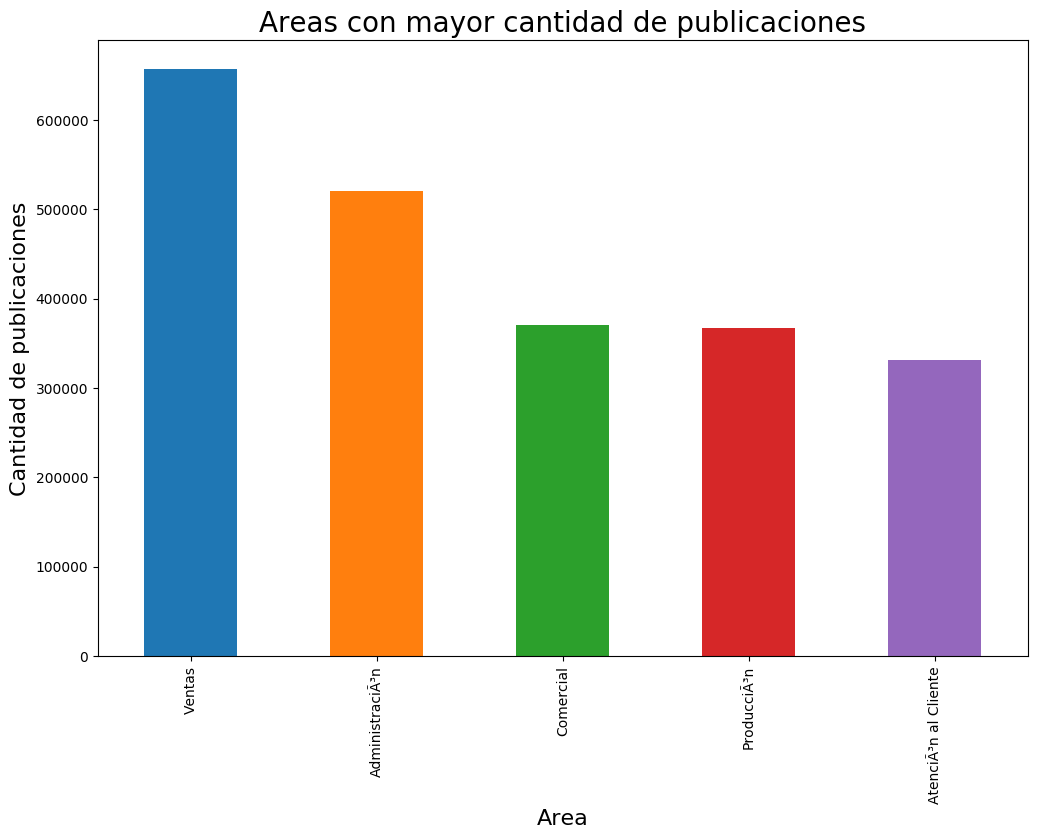

In [51]:

dataFrame.groupby('nombre_area')['idaviso'].agg('count').sort_values(ascending = False)[0:5].plot(kind='bar', rot=90, figsize=(12,8));

plt.title('Areas con mayor cantidad de publicaciones', fontsize=20);
plt.xlabel('Area', fontsize=16);
plt.ylabel('Cantidad de publicaciones', fontsize=16);

### Nos interesaria ver la cantidad de publicaciones que tenemos segun la disponibilidad horaria de los postulantes

Para ellos agrupamos por la columna "tipo_de_trabajo", y luego contamos la cantidad de avisos que hay de cada tipo (Full-time, Part-time y otros)


In [52]:
dataFrame.groupby('tipo_de_trabajo')['idaviso'].count().sort_values(ascending  = False).head()

tipo_de_trabajo
Full-time     4363569
Part-time      662800
Pasantia        27988
Por Horas       17446
Temporario      15205
Name: idaviso, dtype: int64

Eliminamos las que tienen el campo "tipo_de_trabajo" nulo


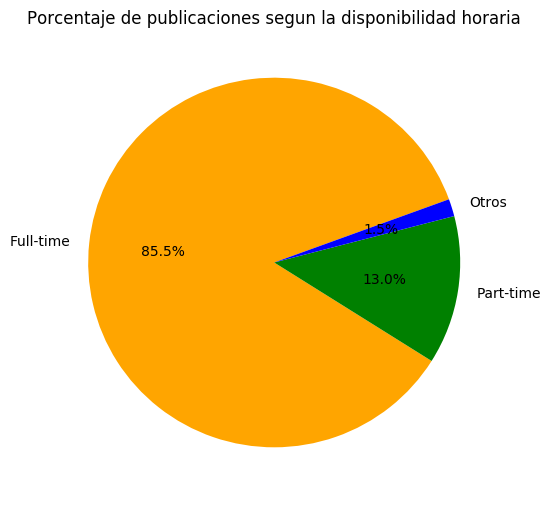

In [53]:
disponibilidades_horarias = dataFrame

disponibilidades_horarias.dropna(subset=['tipo_de_trabajo'],inplace=True)

full_time = disponibilidades_horarias.loc[disponibilidades_horarias.tipo_de_trabajo.str.contains('Full-time'),:]

part_time = disponibilidades_horarias.loc[disponibilidades_horarias.tipo_de_trabajo.str.contains('Part-time'),:]

otros = disponibilidades_horarias.loc[~(disponibilidades_horarias.tipo_de_trabajo.str.contains('Full-time|Part-time')),:]

sizes = [len(full_time), len(part_time), len(otros)]
nombres = ['Full-time', 'Part-time', 'Otros']

plt.figure(figsize=(6, 6))
plt.title('Porcentaje de publicaciones segun la disponibilidad horaria', fontsize=12)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=20, colors=['orange','green','blue'])
plt.show()

### ¿Cuales son los avisos a las que mas personas se postulan? 
Agrupamos por el titulo del aviso, su id y la denominacion de empresa

In [54]:
dataFrame.groupby(['titulo','idaviso','denominacion_empresa'])['idpostulante'].count().sort_values(ascending = False).head()

titulo                                         idaviso     denominacion_empresa  
Representante de Atencion al Cliente/ Banco    1112094756  RANDSTAD                  15935
Asesores de AtenciÃ³n al PÃºblico - Part time  1112345900  Universidad de Palermo    15171
Cajero/a - Part Time                           1112334791  Farmacity                 15115
Cajero/a-Repositor/a (Capital Federal)         1112033906  Farmacity                 14987
Cajero/a - Part Time                           1112204682  Farmacity                 14160
Name: idpostulante, dtype: int64

Viendo los resultados, podriamos decir que hay avisos que estan duplicados. O sea que la empresa publico en una o mas ocasiones la misma busqueda laboral. Entonces podriamos agrupar simplemente todas los avisos que tengan el mismo titulo y que pertenezcan a la misma empresa (descartanto el idaviso)

In [55]:
dataFrame.groupby(['titulo','denominacion_empresa'])['idpostulante'].count().sort_values(ascending = False).head()

titulo                                         denominacion_empresa  
Cajero/a - Part Time                           Farmacity                 29275
Cajero/a-Repositor/a (Capital Federal)         Farmacity                 25184
Representante de Atencion al Cliente/ Banco    RANDSTAD                  15935
Asesor/a de Belleza - Part Time                Farmacity                 15879
Asesores de AtenciÃ³n al PÃºblico - Part time  Universidad de Palermo    15171
Name: idpostulante, dtype: int64

Por lo cual, ahora los resultados cambian. Siendo la busqueda de Cajero/a - Part Time de Farmacity la que mas postulaciones tiene.

Visualizamos los resultados

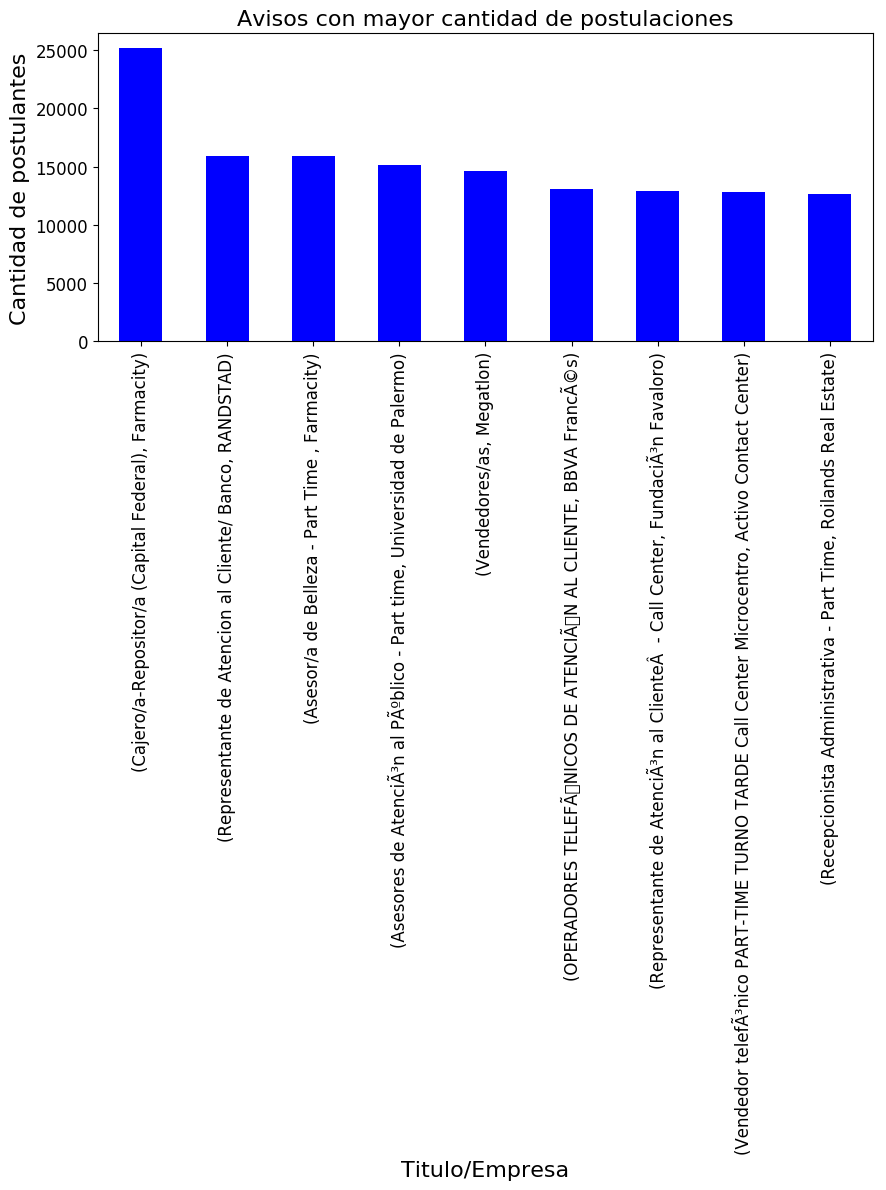

In [56]:
dataFrame.groupby(['titulo','denominacion_empresa'])['idpostulante'].count().sort_values(ascending = False)[1:10].plot(kind='bar',rot = 90,figsize=(10,4),color='blue',fontsize=12)

plt.title('Avisos con mayor cantidad de postulaciones', fontsize=16);
plt.xlabel('Titulo/Empresa', fontsize=16);
plt.ylabel('Cantidad de postulantes', fontsize=16);

Y ahora analizamos el aviso que esta en primera posicion


In [57]:
cajeroFarmacity = dataFrame
cajeroFarmacity.dropna(subset=['titulo'],inplace=True)
cajeroFarmacity = cajeroFarmacity.loc[cajeroFarmacity.titulo.str.contains('Cajero/a - Part Time'),:]

cajeroFarmacity['tipo_de_trabajo'].describe()

count         29302
unique            1
top       Full-time
freq          29302
Name: tipo_de_trabajo, dtype: object

Aunque el titulo del anuncio diga que la busqueda es para Part-Time, aca se puede ver que en realidad se trata para disponibilidad Full-Time.

Nos centramos en el nivel educativo de los postulantes

In [58]:
cajeroFarmacity.groupby(['nombre','estado'])['idpostulante'].count().sort_values(ascending = False).head(10)
            

nombre              estado    
Secundario          Graduado      13623
Universitario       En Curso       4801
Otro                Graduado       2053
Terciario/TÃ©cnico  En Curso       1983
                    Graduado       1923
Universitario       Abandonado     1217
                    Graduado        930
Otro                En Curso        585
Terciario/TÃ©cnico  Abandonado      581
Secundario          En Curso        450
Name: idpostulante, dtype: int64

La gran mayoria se tratan de personas con estudios secundarios graduado. Seguido de otros con estudios universitarios en curso y mas atras graduados en otras cosas.

Seria interesante saber cual es el rango de edad de estas personas. Para ello utilizamos la calumna "fechanaciemto" de la cual optenemos el año de nacimiento de cada postulante 

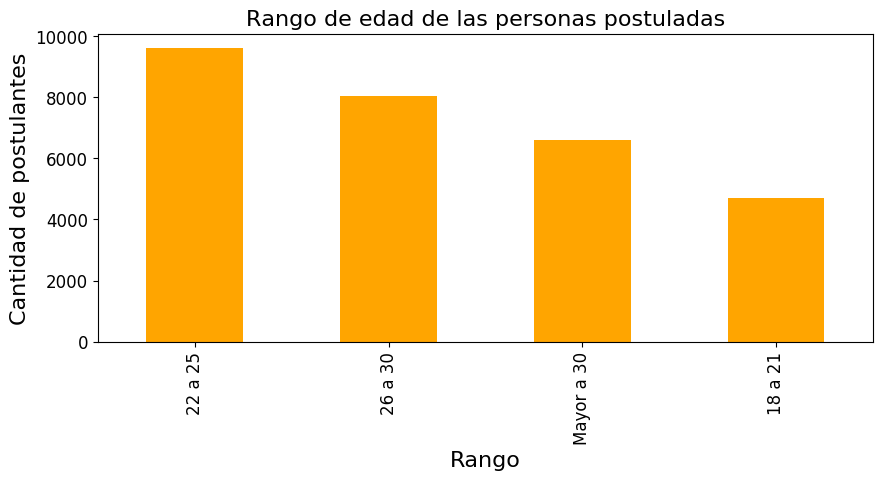

In [59]:
import calendar
import warnings
warnings.filterwarnings('ignore')

#Convertimos la fecha fechanaciento en datetime y agregamos el campo año
cajeroFarmacity['fechanacimiento'] = pd.to_datetime(cajeroFarmacity['fechanacimiento'])
cajeroFarmacity['anio'] = cajeroFarmacity['fechanacimiento'].map(lambda x: x.year)
cajeroFarmacity.dropna(subset= ['anio'], inplace=True)
cajeroFarmacity['anio'] = cajeroFarmacity['anio'].apply(lambda x: int(x))

def rango(x):
    if (x[14]>2000):
        return ("Menor a 18")    
    elif (x[14]<=2000) & (x[14]>=1997):  
        return ("18 a 21")    
    elif (x[14]<=1996) & (x[14]>=1993):
        return ("22 a 25")
    elif (x[14]<=1992) & (x[14]>=1988):
        return ("26 a 30")
    elif (x[14]<1988):
        return ("Mayor a 30")
    
cajeroFarmacity['rango_de_edad'] = cajeroFarmacity.apply(rango,axis=1)

cajeroFarmacity.groupby('rango_de_edad')['idpostulante'].count().sort_values(ascending = False).plot(kind='bar',rot = 90,figsize=(10,4),color='orange',fontsize=12)

plt.title('Rango de edad de las personas postuladas', fontsize=16);
plt.xlabel('Rango', fontsize=16);
plt.ylabel('Cantidad de postulantes', fontsize=16);
    


### Area con postulantes con nivel educativo mas alto  


Primero vemos cuales son los niveles educativos que existen

In [60]:

dataFrame.groupby('nombre')['idpostulante'].count().sort_values(ascending = False).head(10)


nombre
Secundario            1854451
Universitario         1747126
Terciario/TÃ©cnico     786795
Otro                   460616
Posgrado               106742
Master                  53185
Doctorado                3257
Name: idpostulante, dtype: int64

Vemos que encabeza la lista los postulantes con nivel secundario (Ya sea en curso o terminado). Y luego de la lista podemos decir que el doctorado es el grado mas alto que se puede tener. Entonces vamos enfocarnos en este, para ver a cuales areas son las que mas se postulan

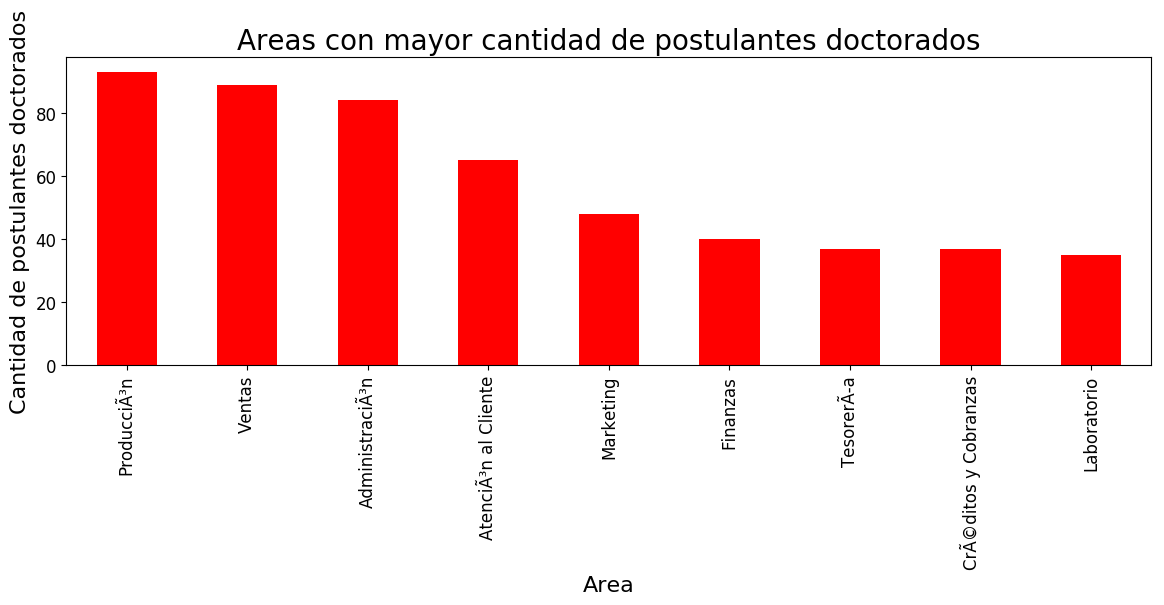

In [61]:
doctorado = dataFrame.loc[(dataFrame.nombre.str.contains('Doctorado') & dataFrame.estado.str.contains('Graduado')),:]

doctorado.groupby('nombre_area')['idpostulante'].count().sort_values(ascending = False)[1:10].plot(kind='bar',rot = 90,figsize=(14,4),color='red',fontsize=12)

plt.title('Areas con mayor cantidad de postulantes doctorados', fontsize=20);
plt.xlabel('Area', fontsize=16);
plt.ylabel('Cantidad de postulantes doctorados', fontsize=16);

 ### ¿Cual es el sexo con mayor cantidad de postulantes?

In [63]:
genero_y_edad2 = genero_y_edad 

In [64]:
IDs_duplicados = sum(genero_y_edad2.idpostulante.value_counts()>1)
IDs_duplicados


0

In [65]:
genero_y_edad2 = genero_y_edad2.groupby('sexo')['idpostulante'].agg(['count']) 
 

In [66]:
genero_y_edad2

,count
sexo,
FEM,101981
MASC,94339
NO_DECLARA,4568


Text(0.5,0,'Sexo')

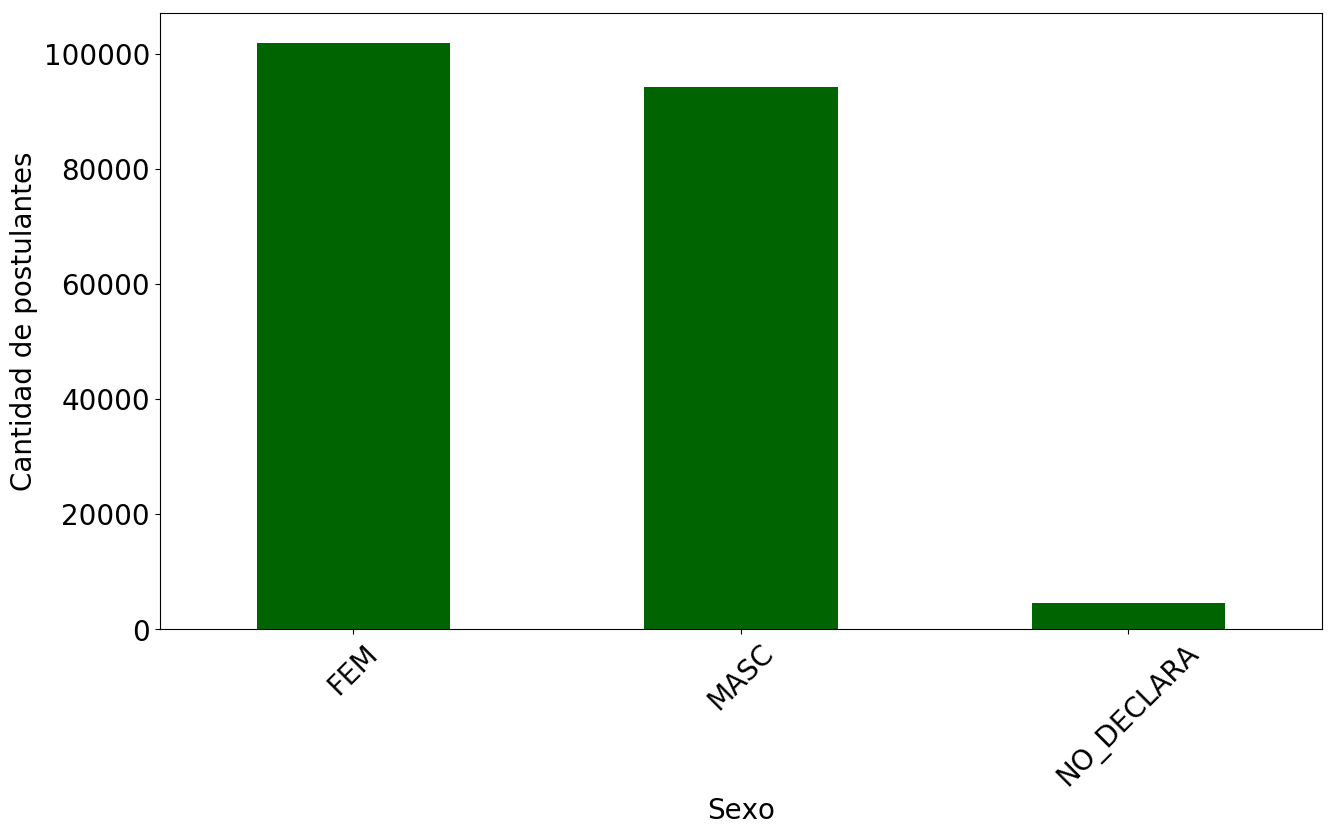

In [89]:
grafico = genero_y_edad2.plot(kind = "bar",\
                            color =["darkgreen","seagreen","limegreen","lightgreen"] ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)
grafico.set_title('')
grafico.set_ylabel("Cantidad de postulantes", fontsize=20)
grafico.set_xlabel("Sexo", fontsize = 20)

Por lo cual se puede ver que la mujeres se postulan en mayor cantidad que los hombres

###  Sexo con mayor cantidad de postulaciones (En los meses de Enero y Febrero de 2018)

In [74]:
postulacionesa = postulaciones
postulacionesa.tail()

,idaviso,idpostulante,fechapostulacion
3401618,1111753681,0zPa0eq,2018-02-28 23:54:44
3401619,1112369306,2zP6Jd0,2018-02-28 23:57:43
3401620,1112308651,8MPoxDW,2018-02-28 23:52:13
3401621,1112341128,8MPoxDW,2018-02-28 23:59:06
3401622,1112369825,2zP6J9V,2018-02-28 23:56:10


Agregamos la columna año luego de splitearla


In [75]:
prop_fecha = postulacionesa['fechapostulacion'].str.split(' ',3,expand=True) 
a=prop_fecha[0].str.split('-',3,expand=True)
 
postulacionesa['year']=a[0]
postulacionesa['month']=a[1]
postulacionesa['day']=a[2]
postulacionesa = postulacionesa


In [76]:
postulacionesa.month.value_counts()


02    2125425
01    1276198
Name: month, dtype: int64

Vemos que son los meses de enero y febrero

In [78]:
postulacionesa.year.value_counts()
            

2018    3401623
Name: year, dtype: int64

Y solo del 2018

In [80]:
IDs_duplicados=sum(postulacionesa.idpostulante.value_counts()>1)
IDs_duplicados


180941

Vemos que hay duplicados en postulaciones

In [82]:
postulantes_sexo=pd.merge(postulaciones,genero_y_edad,on='idpostulante' , how='inner')
postulantes_sexo.tail()

,idaviso,idpostulante,fechapostulacion,year,month,day,fechanacimiento,sexo
3401618,1111753681,0zPa0eq,2018-02-28 23:54:44,2018,02,28,1998-05-09,FEM
3401619,1112369306,2zP6Jd0,2018-02-28 23:57:43,2018,02,28,1997-03-06,FEM
3401620,1112308651,8MPoxDW,2018-02-28 23:52:13,2018,02,28,1997-07-07,MASC
3401621,1112341128,8MPoxDW,2018-02-28 23:59:06,2018,02,28,1997-07-07,MASC
3401622,1112369825,2zP6J9V,2018-02-28 23:56:10,2018,02,28,NaN,NO_DECLARA


In [83]:
postulantes_sexo2=postulantes_sexo 

In [84]:
postulantes_sexo.groupby('sexo')['idpostulante'].agg(['count'])

,count
sexo,
FEM,1688939
MASC,1668601
NO_DECLARA,44083


In [85]:
postulantes_sexo=postulantes_sexo.groupby('sexo')['idpostulante'].agg(['count'])

Text(0.5,0,'Sexo')

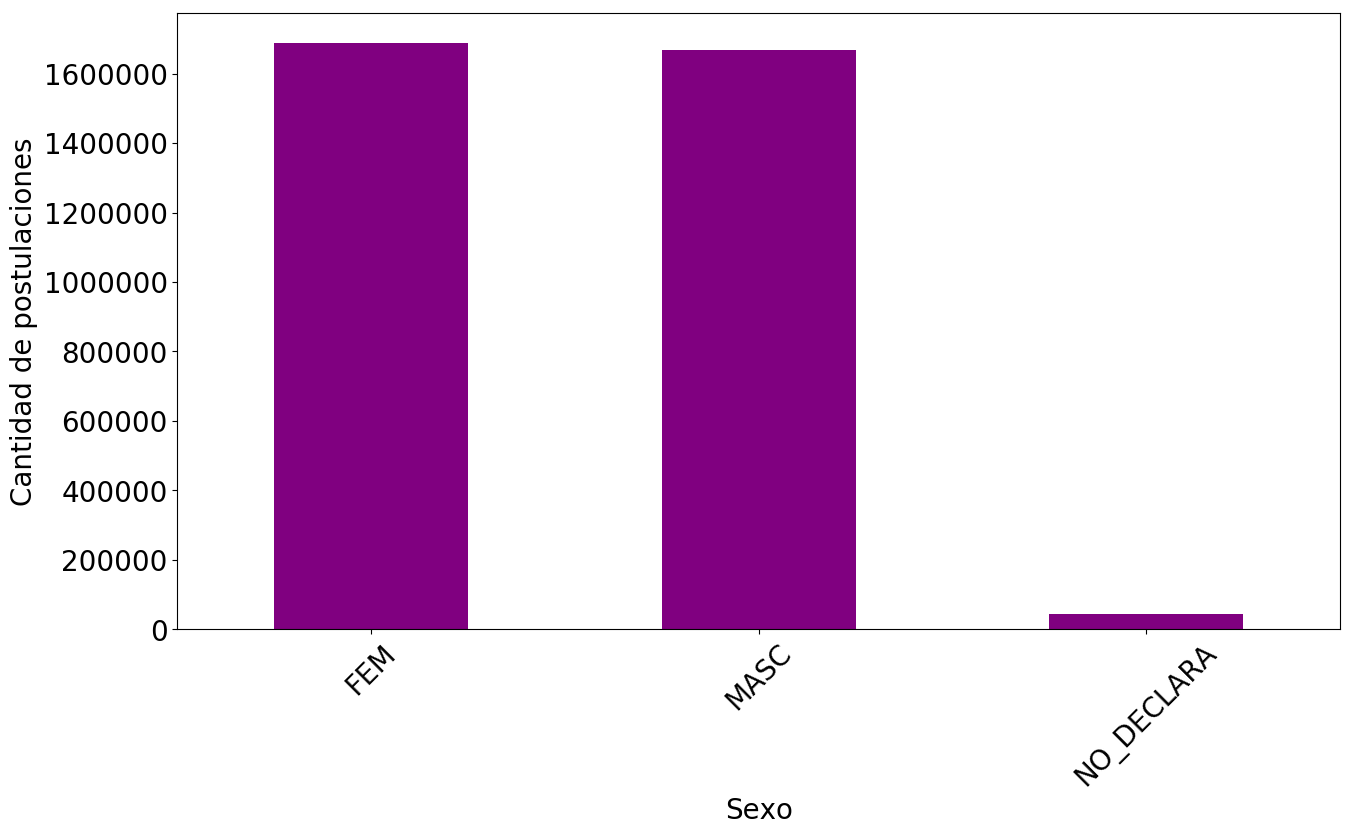

In [92]:
graico =postulantes_sexo.plot(kind = "bar",\
                            color = "Purple" ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)
graico.set_title('')
graico.set_ylabel("Cantidad de postulaciones", fontsize=20)
graico.set_xlabel("Sexo", fontsize = 20)

La cantidad de mujeres que se postulan (una o mas veces) es mayor por un margen minimo a los hombres o los que no declaran sexo

###  Sexo con mayor cantidad de postulados (SIN REPETIR) (En los meses de Enero y Febrero de 2018) 

In [94]:
postulantes_sexo_sinrepeticiones=postulantes_sexo2.drop_duplicates(subset=['idpostulante'], keep=False).reset_index()


In [95]:
IDs_duplicados=sum(postulantes_sexo_sinrepeticiones.idpostulante.value_counts()>1)
IDs_duplicados

0

In [96]:
postulantes_sexo_sinrepeticiones.groupby('sexo')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)

,count
sexo,
FEM,9909
MASC,9232
NO_DECLARA,806


In [97]:
postulantes_sexo_sinrepeticiones=postulantes_sexo_sinrepeticiones.groupby('sexo')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)

Text(0.5,0,'Sexo')

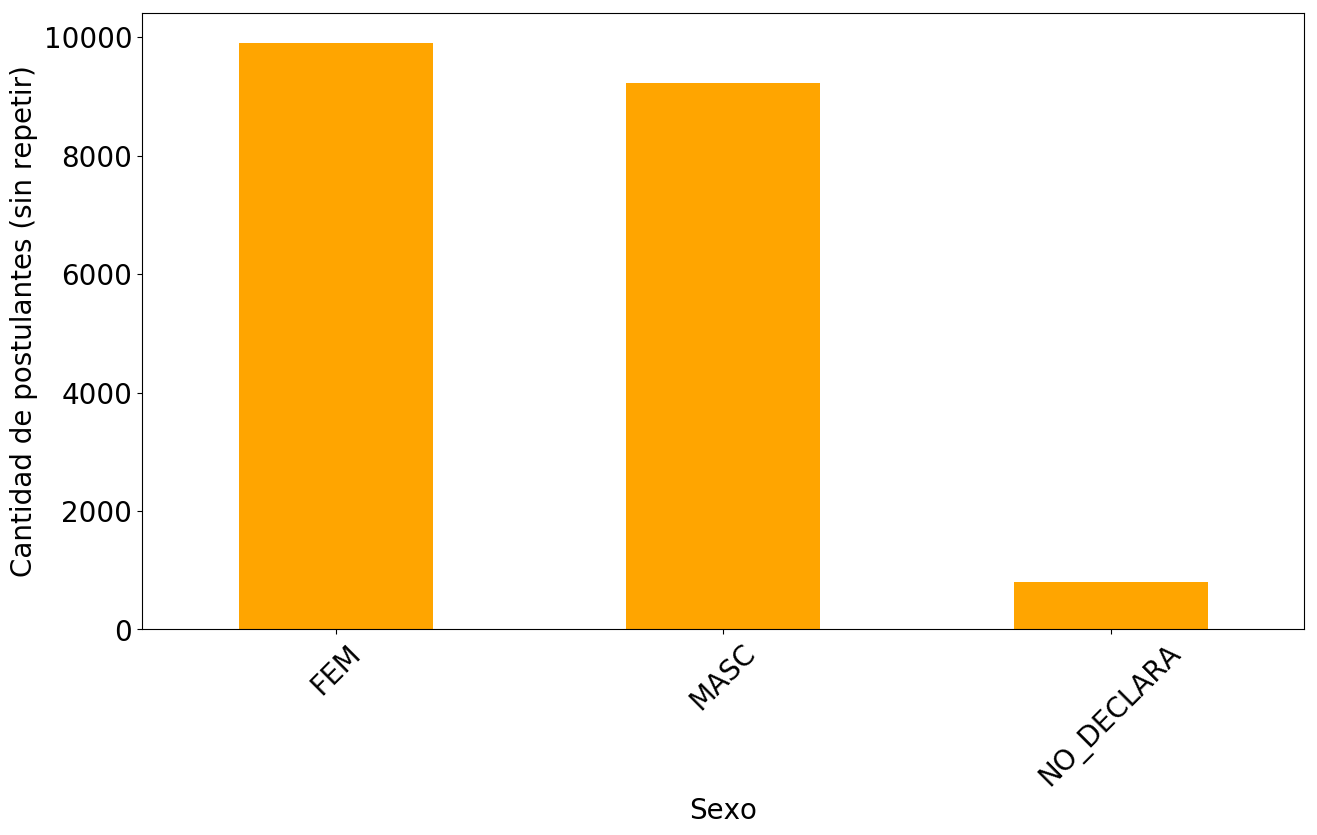

In [100]:
grafico=postulantes_sexo_sinrepeticiones.plot(kind = "bar",\
                            color = "Orange" ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)

grafico.set_title("")
grafico.set_ylabel("Cantidad de postulantes (sin repetir)", fontsize=20)
grafico.set_xlabel("Sexo", fontsize = 20)

Las mujeres se postularon mas ese mes (Sin repetir postulaciones)

### Sexo con mayor cantidad de visitas (Febrero de 2018)

In [102]:
sexo_visitas=pd.merge( visitas,genero_y_edad,on='idpostulante' , how='inner')


Text(0.5,0,'Sexo')

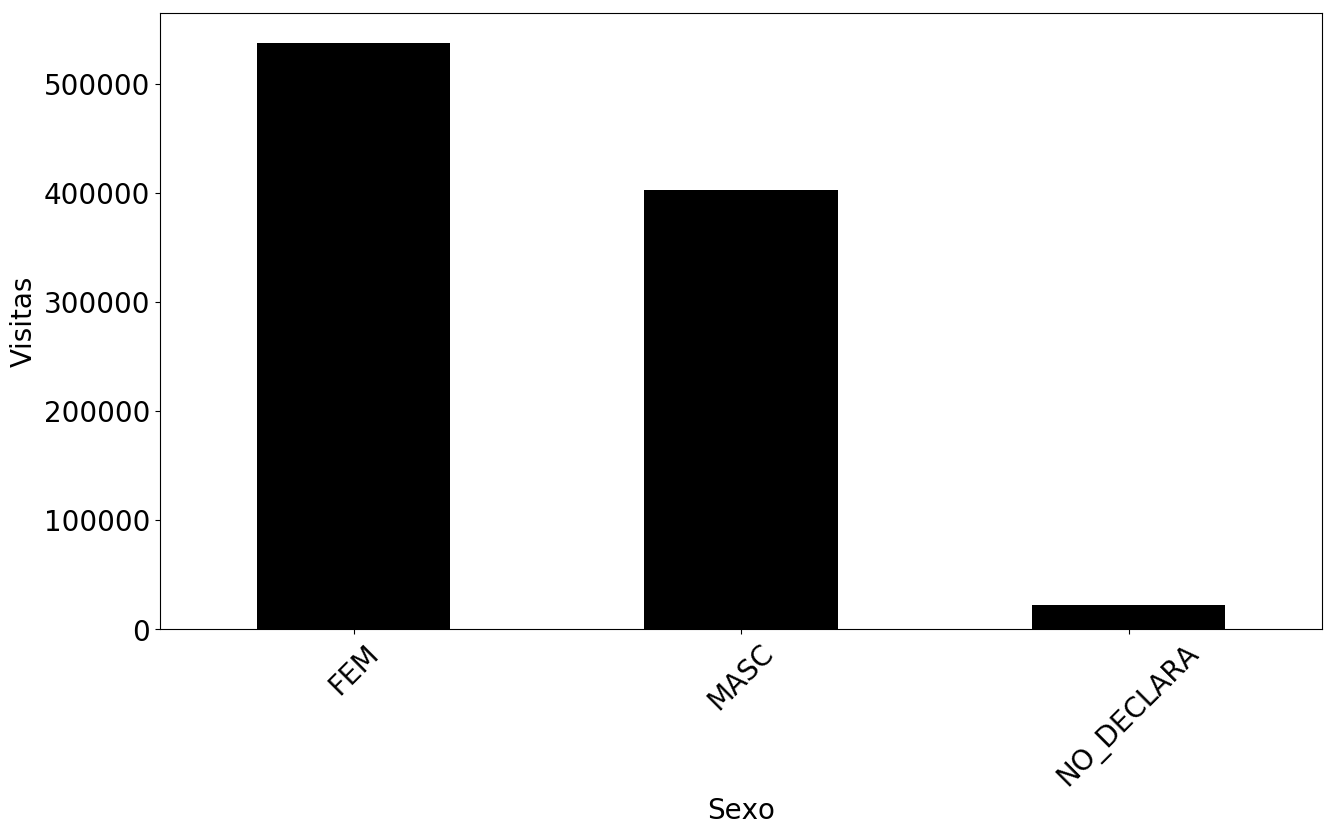

In [106]:
sexo_sitas=sexo_visitas.groupby('sexo')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False).plot(kind = "bar",\
                            color = "Black" ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)

sexo_sitas.set_title("")
sexo_sitas.set_ylabel("Visitas", fontsize=20)
sexo_sitas.set_xlabel('Sexo', fontsize = 20) 

Fueron las mjueres las que mas visitaron los avisos

 ### Nivel de estudio (ya sea en curso o terminado) de las personas que estan postulados

In [108]:
educacion2=educacion

In [109]:
IDs_duplicados=sum(educacion2.idpostulante.value_counts()>1)
IDs_duplicados

80276

In [111]:
educacion2.estado.value_counts()

Graduado      194474
En Curso       78531
Abandonado     25226
Name: estado, dtype: int64

significa que el postulantes podrian haber dejado la carrera, cambiado o comenzado una nueva, 
Por eso hay duplicados

In [112]:
postulaciones3=postulaciones

In [130]:
postulantessinrepeticiones=postulaciones3.drop_duplicates(subset=['idpostulante'], keep=False).reset_index()
#Queremos los que se postulan, por eso eliminamos repetidos

In [131]:
postulantes_nivelestudio=pd.merge( postulantessinrepeticiones,educacion,on='idpostulante' , how='inner')

In [132]:
postulantes_nivelestudio.groupby('nombre')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)

,count
nombre,
Universitario,9278
Secundario,9193
Terciario/TÃ©cnico,4436
Otro,1750
Posgrado,789
Master,363
Doctorado,27


Text(0,0.5,'Nivel de Estudio')

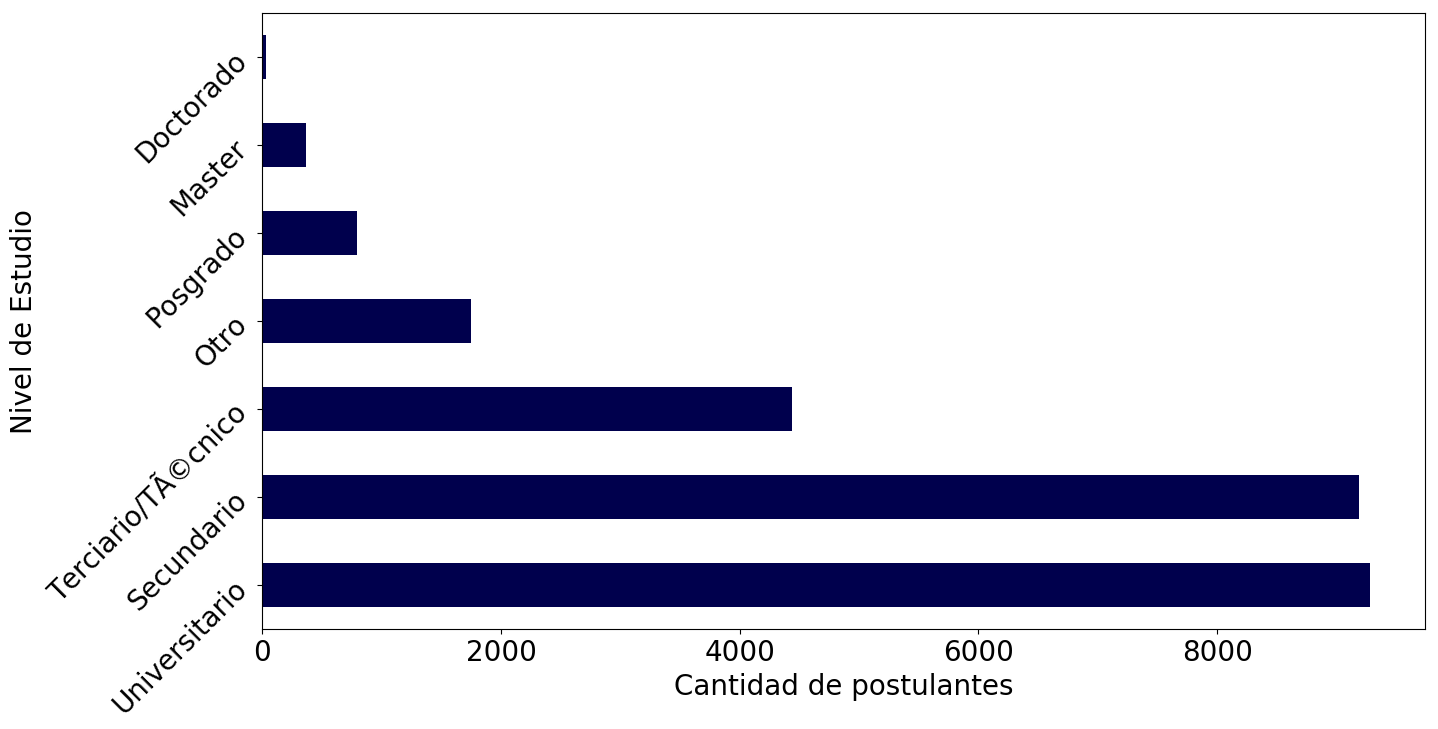

In [133]:
postulantes_nivelestudio=postulantes_nivelestudio.groupby('nombre')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)
my_colors = [(x/10.0, x/20.0, 0.30) for x in range(len(postulantes_nivelestudio))] # <-- Quick gradient example along the Red/Green dimensions.
grafico =postulantes_nivelestudio.plot(kind = "barh",\
                            color = my_colors ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)

grafico.set_title("")
grafico.set_xlabel('Cantidad de postulantes', fontsize=20);
grafico.set_ylabel("Nivel de Estudio", fontsize=20)

El nivel de estudio mas popular entre los postulados fueron el universitario

### Y el tipo de trabajo al que mas se postularon

In [140]:
postulantes_trabajo=pd.merge(postulaciones,avisos_detalle,on='idaviso' , how='inner')
postulantes_trabajo.tail(10)

,idaviso,idpostulante,fechapostulacion,year,month,day,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
3074196,1112358649,W9A98JR,2018-02-24 07:46:02,2018,02,24,1,"Desarrollador FullStack Sr con Java, Mentor pa...",Position: Web and Mobile Development Senior me...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,ProgramaciÃ³n,MindHub
3074197,1112207996,ZDl1Y25,2018-01-18 15:04:58,2018,01,18,1,Ingeniero AgrÃ³nomo Comercial,<p>Nos encontramos en la bÃºsqueda de un Ingen...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,SitioLinks
3074198,1112215478,5mPLovN,2018-01-15 11:49:08,2018,01,15,1,Laminador de Prfv (plÃ¡stico reforzado con fib...,"<p>Imporante empresa en zona norte incorpora, ...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,ProducciÃ³n,Pullmen Servicios Empresarios S.A.
3074199,1112206214,Bm543E2,2018-01-16 13:01:52,2018,01,16,1,Analista Junior de RRHH - Resistencia,<p>Nos encontramos en la bÃºsqueda de un ANALI...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Recursos Humanos,Consultora de Recursos Humanos
3074200,1112204918,EzeGQYo,2018-01-16 09:02:50,2018,01,16,1,Gestor Comercial - Grupo Meditel,"<p style="""">Grupo Meditel busca incorporar par...",Gran Buenos Aires,NaN,NaN,Part-time,Senior / Semi-Senior,Ventas,MEDITEL
3074201,1112205943,PmGYxxj,2018-01-16 10:57:48,2018,01,16,1,Ingeniero Vial,<p>Importante empresa Constructora busca Ingen...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,ConstrucciÃ³n,Ezentya Consultora en RR.HH.
3074202,1112342094,dYJV5K2,2018-02-25 04:48:24,2018,02,25,1,Desarrolladores JAVA SOA / JBOSS RED HAT // Zo...,<p><strong>SOLUTIX</strong>Â estÃ¡ en la bÃºsq...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,ProgramaciÃ³n,SOLUTIX S.A.
3074203,1112206295,xkdOVkx,2018-01-15 09:05:45,2018,01,15,1,Farmacutico,<p>HELIOS SALUDÂ se encuentra en laÂ bÃºsqueda...,Capital Federal,NaN,San Telmo,Full-time,Senior / Semi-Senior,FarmacÃ©utica,HELIOS SALUD
3074204,1111378594,NzrwXm4,2018-01-15 19:54:21,2018,01,15,1,We are looking for a Actionscript Developer to...,<div>Globant's Gaming Studio works with the to...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Tecnologia / Sistemas,Globant
3074205,1112209328,ow2151r,2018-01-15 09:57:21,2018,01,15,1,Operarios con secundario tÃ©cnico Z/LanÃºs,<p>Estamos en la bÃºsqueda de operarios con se...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,ProducciÃ³n,Pullmen Servicios Empresarios S.A.


In [142]:
postulantes_trabajo.groupby('tipo_de_trabajo')['idpostulante'].agg(['count']).head() 

,count
tipo_de_trabajo,
Fines de Semana,1900
Full-time,2633145
Part-time,394677
Pasantia,15457
Por Contrato,3826


Text(0,0.5,'Tipo de Trabajo al que se postularon')

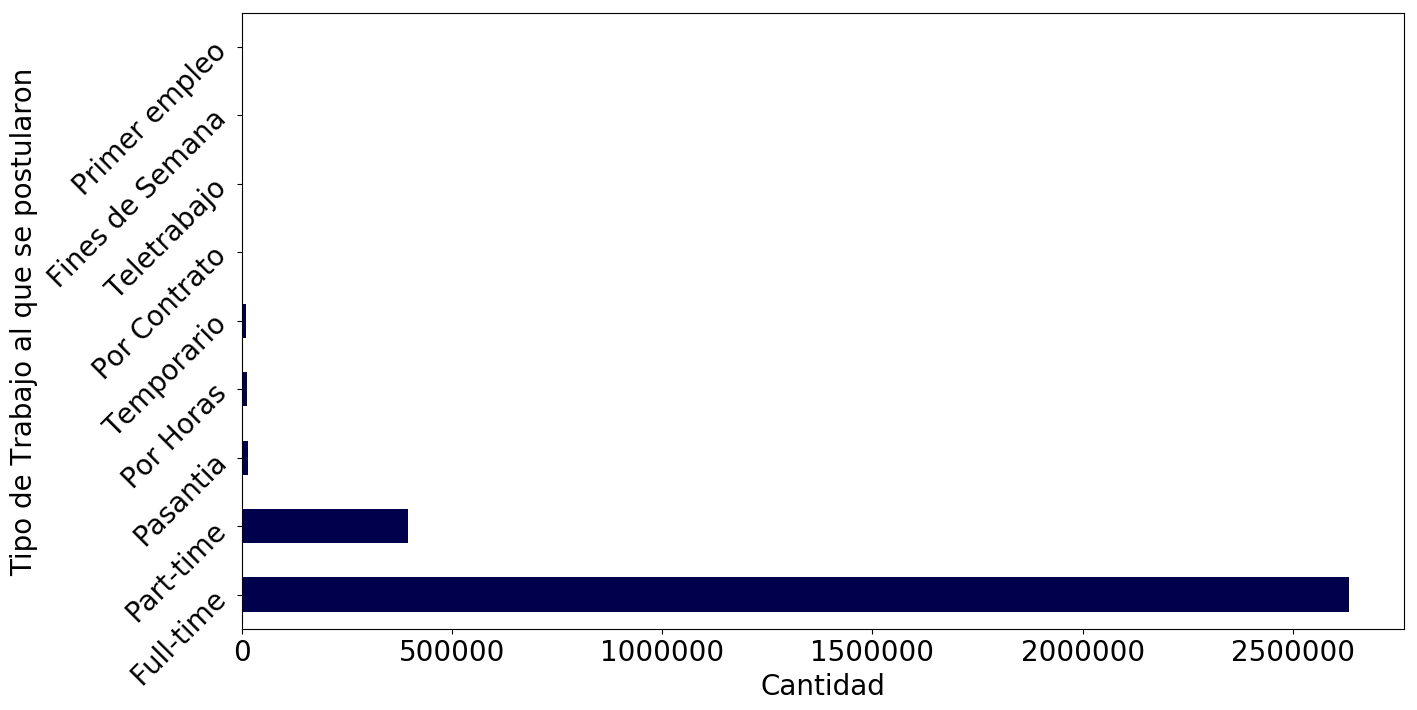

In [143]:
postulantes_trabajo=postulantes_trabajo.groupby('tipo_de_trabajo')['idpostulante'].agg(['count']).sort_values(by='count',ascending = False)
my_colors = [(x/10.0, x/20.0, 0.30) for x in range(len(postulantes_trabajo))] # <-- Quick gradient example along the Red/Green dimensions.
grafico = postulantes_trabajo.plot(kind = "barh",\
                            color = my_colors ,\
                            fontsize=20,figsize = (15,8), rot = 45, legend = False)

grafico.set_title("")
grafico.set_xlabel('Cantidad', fontsize=20);
grafico.set_ylabel("Tipo de Trabajo al que se postularon", fontsize=20)

El tipo de trabajo que mas se postularon fue el Full-Time